# Comparison of 1st and 2nd order

In [3]:
using FundamentalsNumericalComputation

In [4]:
f = x -> sin( exp(x+1) );
exact_value = cos(exp(1))*exp(1);

We'll run both formulas in parallel for a sequence of $h$ values.

In [6]:
h = @. 4. ^(-1:-1:-8)
FD1 = [];  FD2 = [];
for h in h
    push!(FD1, (f(h)-f(0)) / h )
    push!(FD2, (f(h)-f(-h)) / 2h ) 
end

pretty_table([h FD1 FD2],["h","FD1","FD2"])

┌──────────────────┬─────────────────────┬─────────────────────┐
│                h │                 FD1 │                 FD2 │
├──────────────────┼─────────────────────┼─────────────────────┤
│             0.25 │ -3.0100196002533077 │ -2.3924525328620603 │
│           0.0625 │ -2.6451014322652484 │  -2.473905902362808 │
│         0.015625 │  -2.521133723616341 │  -2.478075703599398 │
│       0.00390625 │ -2.4891011707672988 │  -2.478332620635271 │
│     0.0009765625 │ -2.4810408642263155 │  -2.478348663491829 │
│   0.000244140625 │ -2.4790227172861705 │  -2.478349666114127 │
│   6.103515625e-5 │  -2.478517991587978 │ -2.4783497287785394 │
│ 1.52587890625e-5 │ -2.4783917983913852 │ -2.4783497326825454 │
└──────────────────┴─────────────────────┴─────────────────────┘


All that's easy to see from this table is that FD2 appears to converge to the same result as FD1, but more rapidly. In each case $h$ is decreased by a factor of 4, so that the error is reduced by a factor of 4 in the first-order method and 16 in the second-order method.

In [16]:
error_FD1 = @. exact_value - FD1 
error_FD2 = @. exact_value - FD2

pretty_table([log2.(h) error_FD1 error_FD2],["log_2(h)","error in FD1","error in FD2"])

┌──────────┬────────────────────────┬─────────────────────────┐
│ log_2(h) │           error in FD1 │            error in FD2 │
├──────────┼────────────────────────┼─────────────────────────┤
│     -2.0 │     0.5316698672980729 │    -0.08589720009317459 │
│     -4.0 │    0.16675169931001355 │   -0.004443830592427034 │
│     -6.0 │    0.04278399066110605 │ -0.00027402935583697996 │
│     -8.0 │   0.010751437812063891 │   -1.711231996370799e-5 │
│    -10.0 │   0.002691131271080671 │  -1.0694634058339147e-6 │
│    -12.0 │  0.0006729843309356554 │   -6.684110775978525e-8 │
│    -14.0 │ 0.00016825863274316788 │   -4.176695433955047e-9 │
│    -16.0 │  4.2065436150373614e-5 │ -2.7268942659475215e-10 │
└──────────┴────────────────────────┴─────────────────────────┘


A graphical comparison can be clearer. On a log-log scale, the error should (roughly) be a straight line whose slope is the order of accuracy. However, it's conventional in convergence plots, to show $h$ _decreasing_ from left to right, which negates the slopes.

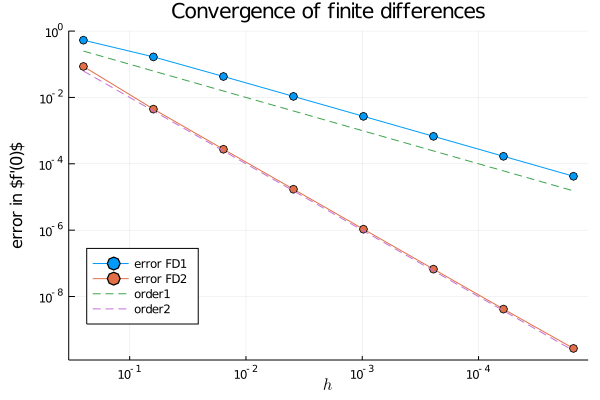

In [14]:
plot(h,abs.([error_FD1 error_FD2]),m=:o,label=["error FD1" "error FD2"],
    xflip=true, xaxis=(:log10,"\$h\$"), yaxis=(:log10,"error in \$f'(0)\$"),
    title="Convergence of finite differences", leg=:bottomleft)

plot!(h,[h h.^2],l=:dash,label=["order1" "order2"])      # perfect 1st and 2nd order